<a href="https://colab.research.google.com/github/AnusreeMandal/Machine_learning/blob/main/ML_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






Name:Anusree Mandal

Roll no:2022csb016

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mount and Load Data

In [ ]:
data_path = "/content/drive/MyDrive/ML_DRIVE/Assign_1/train.csv"
df = pd.read_csv(data_path)

In [ ]:
print("📄 First 5 Rows of the Dataset:")
print(df.head())
print(df.info())

📄 First 5 Rows of the Dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sa

In [ ]:


# Checking for missing values in each column
print("\n❌ Missing Values per Column:")
print(df.isnull().sum()[df.isnull().sum() > 0])


❌ Missing Values per Column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# Fill missing numeric values with median

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

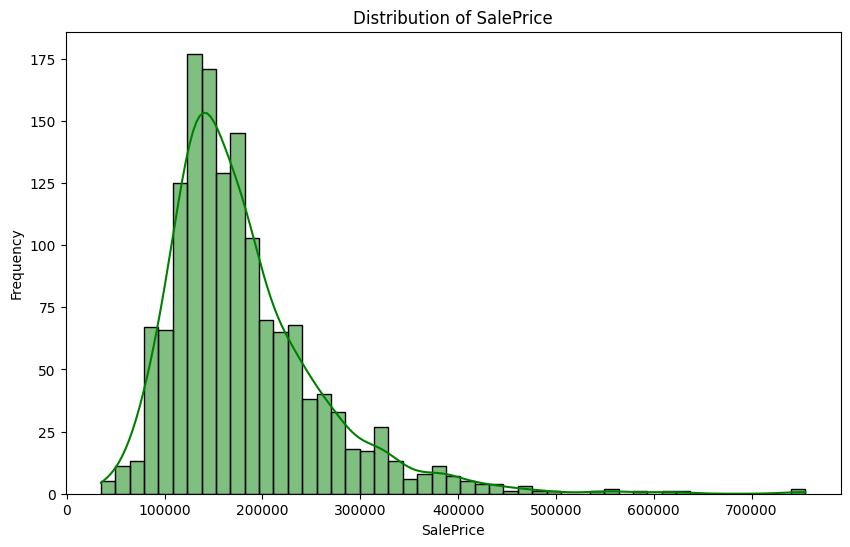

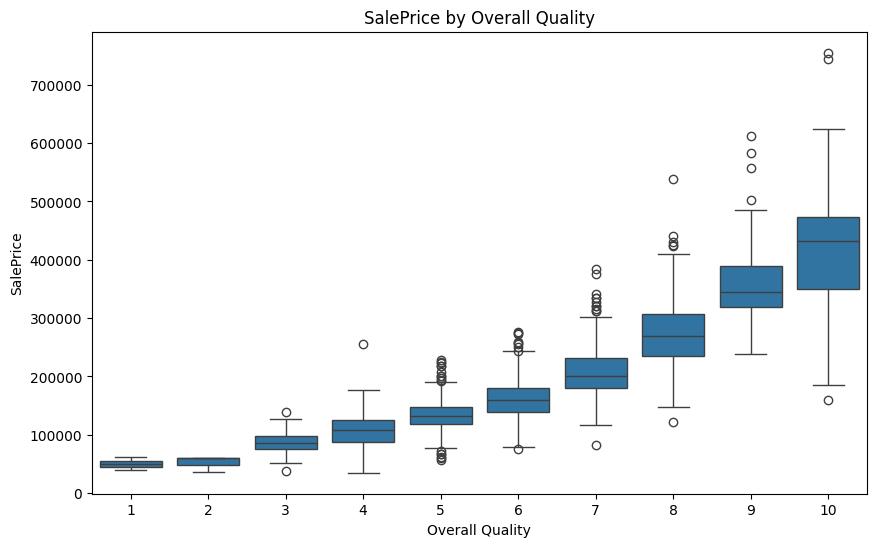

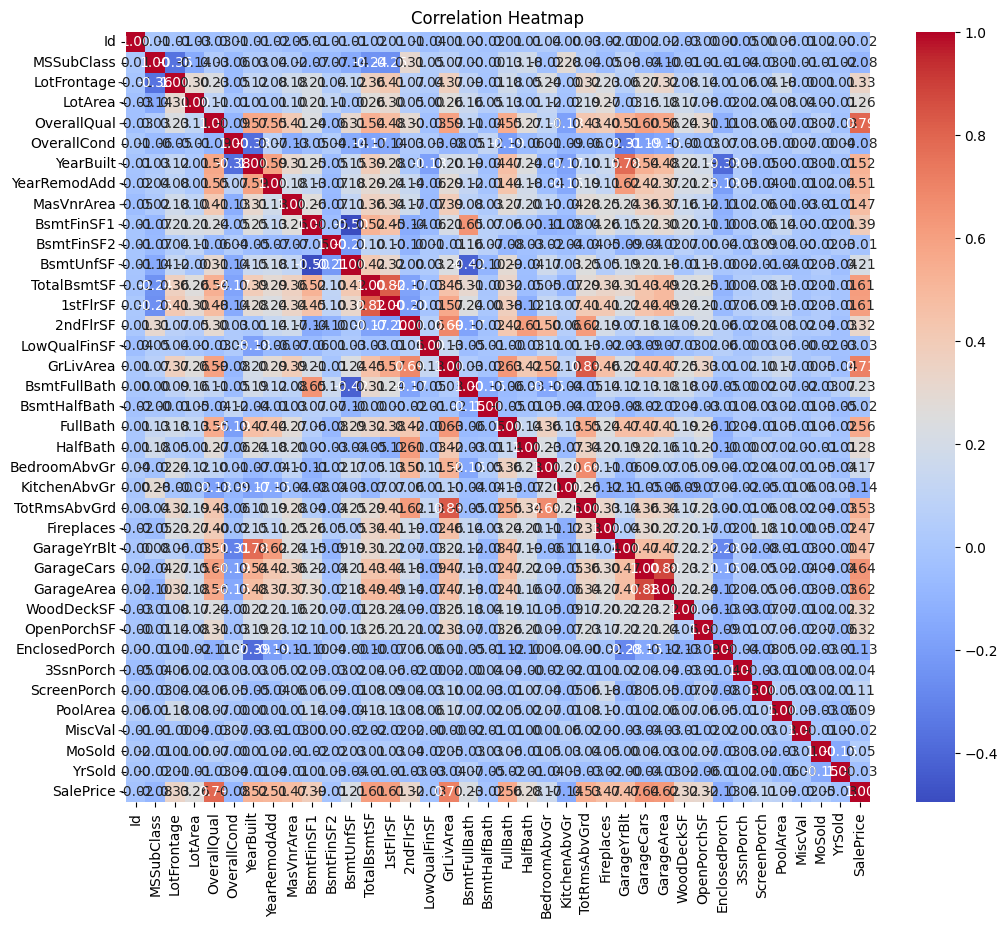

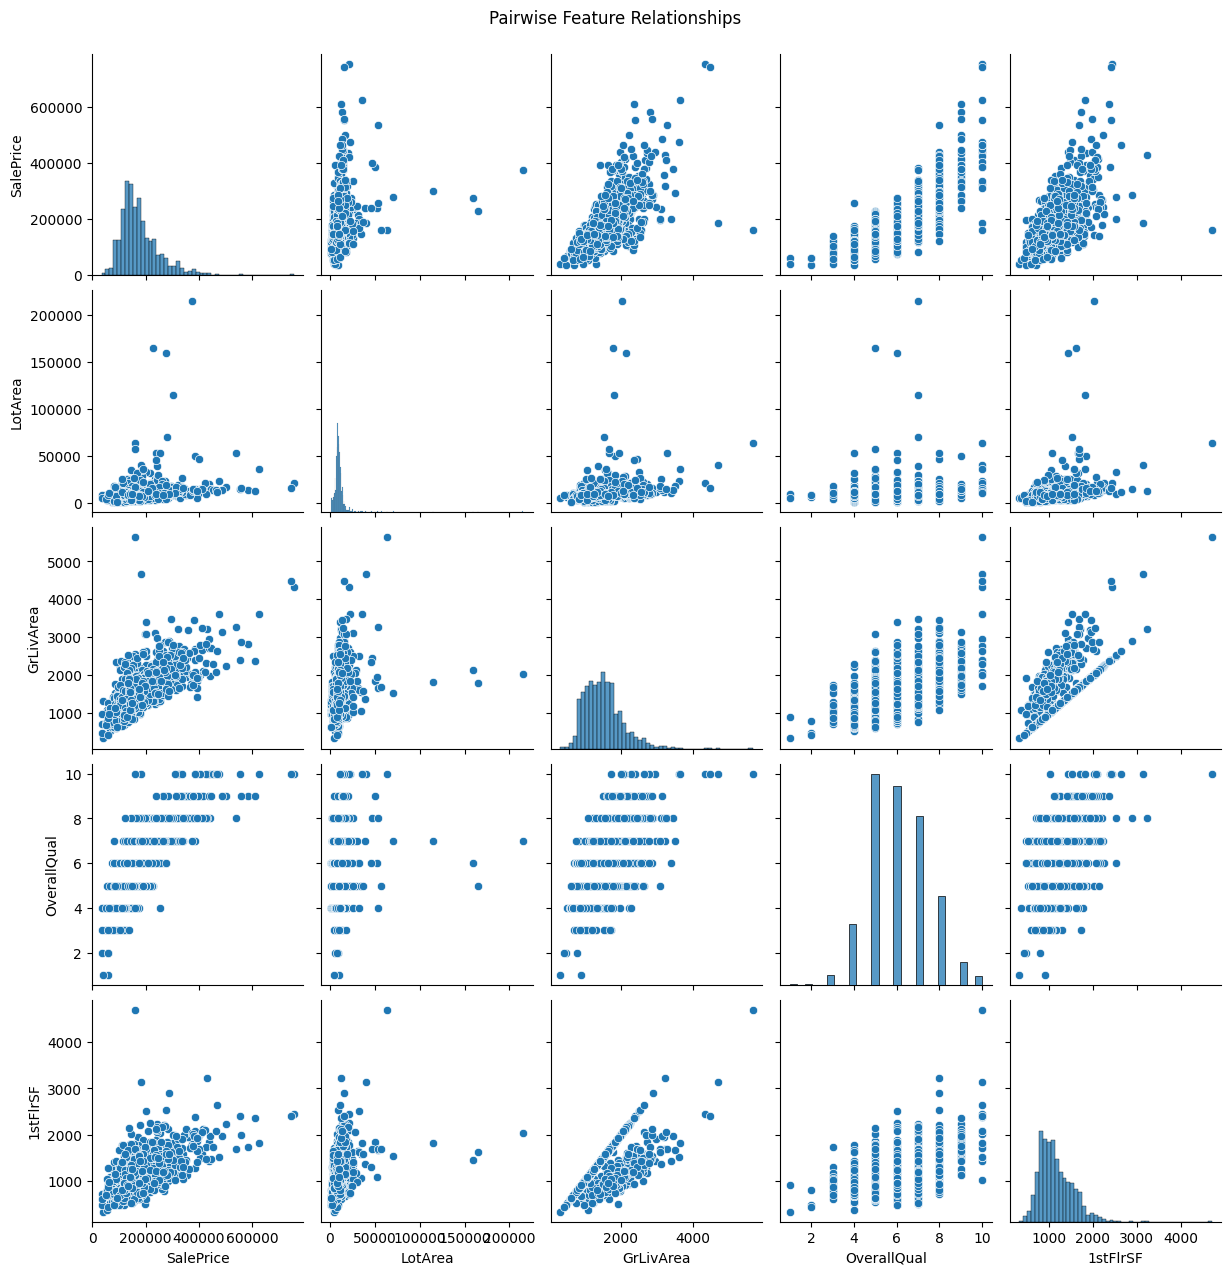

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Histogram of SalePrice
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, color='green')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

#  Boxplot: SalePrice vs OverallQual
plt.figure(figsize=(10,6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#  Pairplot for selected variables
sns.pairplot(df[['SalePrice', 'LotArea', 'GrLivArea', 'OverallQual', '1stFlrSF']])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


Create bins of SalePrice for stratification

In [ ]:
df['PriceBin'] = pd.qcut(df['SalePrice'], q=5, labels=False)

# Include all potential features for the mixed models
X = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea', 'Street', 'Neighborhood', 'YrSold']]
y = df['SalePrice']

Stratified K-Fold Split

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_idx, test_idx = next(iter(skf.split(X, df['PriceBin'])))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

Simple Linear Regression on LotArea

In [ ]:
simple_model = LinearRegression()
simple_model.fit(X_train[['LotArea']], y_train)

print("\n📈 Simple Linear Regression (LotArea)")
print(f"Slope: {simple_model.coef_[0]}")
print(f"Intercept: {simple_model.intercept_}")

y_train_pred = simple_model.predict(X_train[['LotArea']])
y_test_pred = simple_model.predict(X_test[['LotArea']])

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R² :", r2_score(y_train, y_train_pred))
print("Test MSE :", mean_squared_error(y_test, y_test_pred))
print("Test R²  :", r2_score(y_test, y_test_pred))


📈 Simple Linear Regression (LotArea)
Slope: 1.930182187071789
Intercept: 159892.05171227152
Train MSE: 5809609176.455702
Train R² : 0.0701296710062762
Test MSE : 6117337068.000841
Test R²  : 0.06468384592121701


Multiple Regression Models

In [ ]:
def run_model(features, model_name):
    model = LinearRegression()
    model.fit(X_train[features], y_train)

    y_pred_train = model.predict(X_train[features])
    y_pred_test = model.predict(X_test[features])

    print(f"\n📊 {model_name}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Train MSE:", mean_squared_error(y_train, y_pred_train))
    print("Train R² :", r2_score(y_train, y_pred_train))
    print("Test MSE :", mean_squared_error(y_test, y_pred_test))
    print("Test R²  :", r2_score(y_test, y_pred_test))

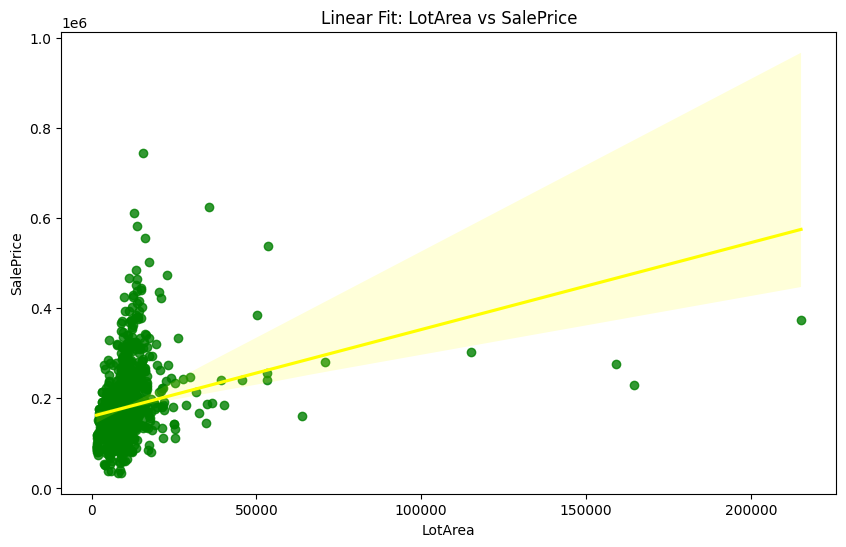

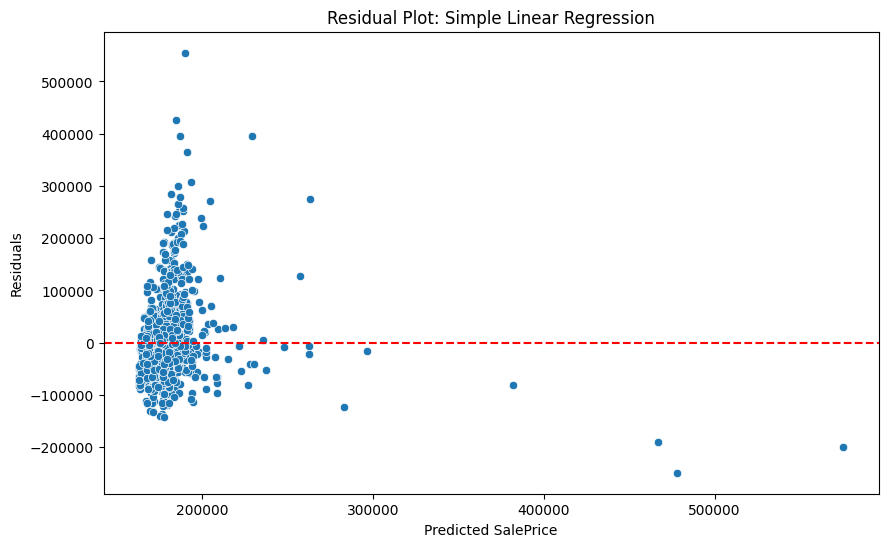

In [ ]:
#  Regression Line Plot
plt.figure(figsize=(10,6))
sns.regplot(x=X_train['LotArea'], y=y_train, scatter_kws={"color": "green"}, line_kws={"color": "yellow"})
plt.title('Linear Fit: LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

#  Residual Plot
residuals = y_train - y_train_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Simple Linear Regression')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Model 1
run_model(['LotFrontage', 'LotArea'], "Model 1: LotFrontage, LotArea")

# Model 2
run_model(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'],
          "Model 2: + OverallQual + OverallCond")

# Model 3
run_model(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea'],
          "Model 3: + 1stFlrSF + GrLivArea")

# ✅ Step 8: Clean up bin column (optional)
df.drop(columns='PriceBin', inplace=True)



📊 Model 1: LotFrontage, LotArea
Coefficients: [986.89563863   1.31292614]
Intercept: 97142.47154678802
Train MSE: 5357717591.728842
Train R² : 0.14245821562893102
Test MSE : 5672172768.539935
Test R²  : 0.13274767105894492

📊 Model 2: + OverallQual + OverallCond
Coefficients: [ 3.70240555e+02  1.11257804e+00  4.26535760e+04 -8.28391485e+02]
Intercept: -112121.16115786557
Train MSE: 2015980950.2758882
Train R² : 0.6773275426038612
Test MSE : 2368672579.9765186
Test R²  : 0.6378395201787496

📊 Model 3: + 1stFlrSF + GrLivArea
Coefficients: [3.46659525e+01 6.57932164e-01 3.13880970e+04 3.71686514e+02
 3.09100268e+01 3.85687531e+01]
Intercept: -116130.1567787505
Train MSE: 1596372036.2052507
Train R² : 0.7444890102903334
Test MSE : 1683921665.8761635
Test R²  : 0.7425351719564566


In [ ]:
# Define mixed models
models_mixed = {
    "Model 4": ['LotArea', 'Street'],
    "Model 5": ['LotArea', 'OverallCond', 'Street', 'Neighborhood'],
    "Model 6": ['LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YrSold']
}

In [ ]:
# Store coefficients of LotArea for comparison later
lotarea_weights = {}

def run_mixed_model(features, model_name):
    # Split into numeric and categorical features
    numeric_features = [col for col in features if df[col].dtype != 'object']
    categorical_features = [col for col in features if df[col].dtype == 'object']

    # Preprocessing pipeline
    preprocessor = ColumnTransformer([
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
# Train the model
    pipeline.fit(X_train[features], y_train)

    # Predict
    y_pred_train = pipeline.predict(X_train[features])
    y_pred_test = pipeline.predict(X_test[features])

    print(f"\n {model_name}")
    print("Train MSE:", mean_squared_error(y_train, y_pred_train))
    print("Train R² :", r2_score(y_train, y_pred_train))
    print("Test MSE :", mean_squared_error(y_test, y_pred_test))
    print("Test R²  :", r2_score(y_test, y_pred_test))

    # Extract and store LotArea coefficient
    # Need to handle cases where 'LotArea' is not in the features
    if 'LotArea' in numeric_features:
        lotarea_index = numeric_features.index('LotArea')
        lotarea_coef = pipeline.named_steps['regressor'].coef_[lotarea_index]
        lotarea_weights[model_name] = lotarea_coef
    else:
        lotarea_weights[model_name] = None # Or some indicator that LotArea was not a feature

# run all the mixed models


In [ ]:
for model_name, features in models_mixed.items():
    run_mixed_model(features, model_name)


 Model 4
Train MSE: 5746642169.268695
Train R² : 0.08020799984223637
Test MSE : 6084441666.778705
Test R²  : 0.06971342003425862

 Model 5
Train MSE: 2612586339.345653
Train R² : 0.5818364979287735
Test MSE : 2903782617.9326844
Test R²  : 0.5560233545585549

 Model 6
Train MSE: 1951306843.7792003
Train R² : 0.687679105137391
Test MSE : 2113300487.3220782
Test R²  : 0.6768848827123952


# Compare LotArea Coefficients for All 6 Models

In [ ]:
# Append LotArea weights from Models 1 to 3 (numeric only)
lotarea_weights["Model 1"] = LinearRegression().fit(X_train[['LotFrontage', 'LotArea']], y_train).coef_[1]
lotarea_weights["Model 2"] = LinearRegression().fit(X_train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']], y_train).coef_[1]
lotarea_weights["Model 3"] = LinearRegression().fit(
    X_train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']], y_train).coef_[1]

/tmp/ipython-input-1019706187.py:71: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


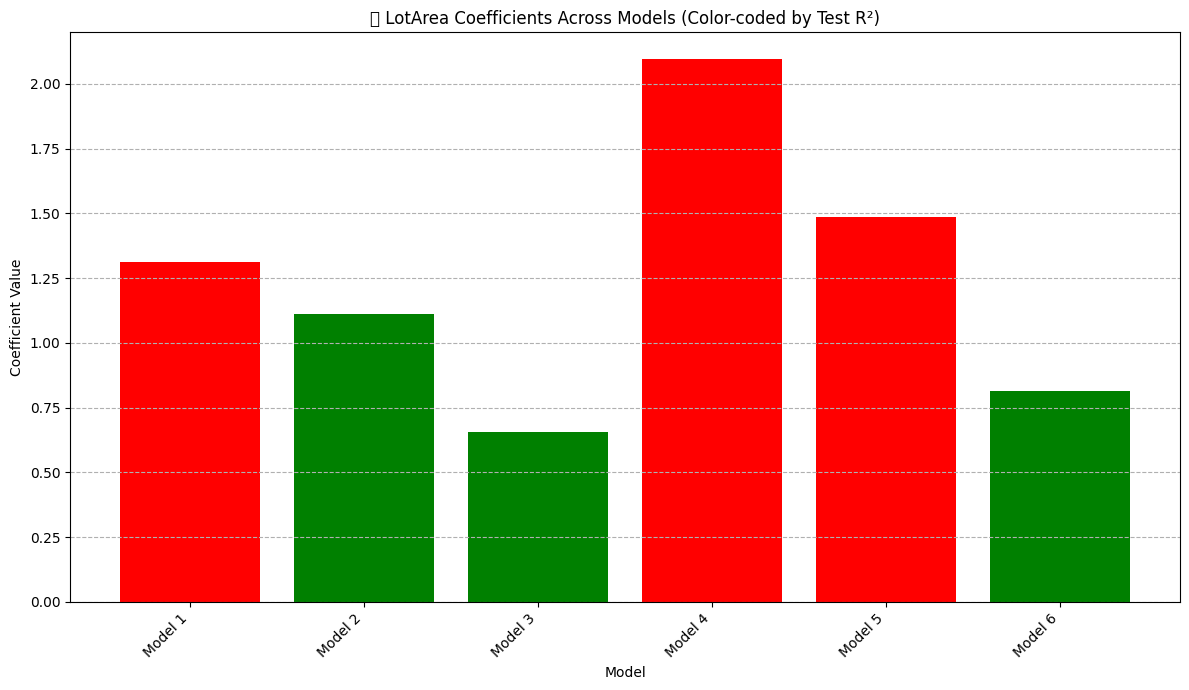


Summary of LotArea Coefficient Chart Interpretation:
----------------------------------------------------
This bar chart visualizes the estimated coefficient for the 'LotArea' feature in each of the six linear regression models.
The height of each bar represents the magnitude and direction (positive or negative) of the LotArea coefficient in that model.
The bars are color-coded based on the model's performance on the test set, as measured by the R-squared value:
- Green bars represent models with a Test R² greater than 0.6 (indicating better performance).
- Red bars represent models with a Test R² less than or equal to 0.6 (indicating poorer performance).

Key observations from the chart:
- Model Model 1: LotArea Coefficient = 1.3129, Test R² = 0.1327 (Red)
- Model Model 2: LotArea Coefficient = 1.1126, Test R² = 0.6378 (Green)
- Model Model 3: LotArea Coefficient = 0.6579, Test R² = 0.7425 (Green)
- Model Model 4: LotArea Coefficient = 2.0947, Test R² = 0.0697 (Red)
- Model Model 5: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort for consistent ordering
ordered_keys = sorted(lotarea_weights.keys())
weights = [lotarea_weights[key] for key in ordered_keys]

# Get test R-squared values for coloring
# You would need to have stored these values when running the models
# For demonstration, let's assume you have a dictionary like this:
# model_test_r2 = {"Model 1": 0.06468, "Model 2": 0.6378, "Model 3": 0.7425,
#                  "Model 4": 0.0697, "Model 5": 0.5560, "Model 6": 0.6768}

# Since we didn't explicitly store test R-squared for all models in a single dict,
# let's retrieve them or re-calculate for coloring purposes.
# This is a simplified approach; in a real scenario, store these during model training.
model_test_r2 = {}

# Get R2 for numeric models (Models 1, 2, 3)
numeric_models_features = {
    "Model 1": ['LotFrontage', 'LotArea'],
    "Model 2": ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'],
    "Model 3": ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
}
for model_name, features in numeric_models_features.items():
    model = LinearRegression().fit(X_train[features], y_train)
    y_pred_test = model.predict(X_test[features])
    model_test_r2[model_name] = r2_score(y_test, y_pred_test)

# Get R2 for mixed models (Models 4, 5, 6) - Need to re-run or access stored R2
# Re-running for demonstration. In a real scenario, store R2 during run_mixed_model
models_mixed_features = {
    "Model 4": ['LotArea', 'Street'],
    "Model 5": ['LotArea', 'OverallCond', 'Street', 'Neighborhood'],
    "Model 6": ['LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YrSold']
}
for model_name, features in models_mixed_features.items():
     # Split into numeric and categorical features
    numeric_features = [col for col in features if df[col].dtype != 'object']
    categorical_features = [col for col in features if df[col].dtype == 'object']

    # Preprocessing pipeline
    preprocessor = ColumnTransformer([
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    pipeline.fit(X_train[features], y_train)
    y_pred_test = pipeline.predict(X_test[features])
    model_test_r2[model_name] = r2_score(y_test, y_pred_test)


# Define a threshold for "better" results (e.g., R-squared above a certain value)
# You can adjust this threshold based on what you consider good performance
r2_threshold = 0.6

# Assign colors based on R-squared
colors = ['green' if model_test_r2[key] > r2_threshold else 'red' for key in ordered_keys]

plt.figure(figsize=(12,7))
plt.bar(ordered_keys, weights, color=colors)
plt.title("📊 LotArea Coefficients Across Models (Color-coded by Test R²)")
plt.ylabel("Coefficient Value")
plt.xlabel("Model")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Print a summary of the interpretation
print("\nSummary of LotArea Coefficient Chart Interpretation:")
print("----------------------------------------------------")
print("This bar chart visualizes the estimated coefficient for the 'LotArea' feature in each of the six linear regression models.")
print("The height of each bar represents the magnitude and direction (positive or negative) of the LotArea coefficient in that model.")
print(f"The bars are color-coded based on the model's performance on the test set, as measured by the R-squared value:")
print(f"- Green bars represent models with a Test R² greater than {r2_threshold} (indicating better performance).")
print(f"- Red bars represent models with a Test R² less than or equal to {r2_threshold} (indicating poorer performance).")
print("\nKey observations from the chart:")
for key in ordered_keys:
    color = 'Green' if model_test_r2[key] > r2_threshold else 'Red'
    print(f"- Model {key}: LotArea Coefficient = {lotarea_weights[key]:.4f}, Test R² = {model_test_r2[key]:.4f} ({color})")

print("\nInterpretation:")
print("The chart shows how the estimated impact of LotArea on SalePrice changes when different sets of features (including categorical ones after one-hot encoding) are included in the model.")
print("Models with higher complexity (including more relevant features) tend to have different LotArea coefficients compared to simpler models.")
print("The color coding helps to quickly identify models that perform better overall and see how the LotArea coefficient behaves within those models.")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def run_polynomial_regression(degree):
    print(f"\n🔺 Polynomial Regression (Degree {degree})")

    # Transform LotArea to polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train[['LotArea']])
    X_test_poly = poly.transform(X_test[['LotArea']])

    # Fit linear model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Coefficients
    print(f"Weights (coefficients): {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Train R² Score: {r2_score(y_train, y_train_pred):.4f}")
    print(f"Test R² Score: {r2_score(y_test, y_test_pred):.4f}")
    print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
    print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}")

    # Plot on Training Set
    plt.figure(figsize=(10,5))
    plt.scatter(X_train['LotArea'], y_train, color='gray', label='Actual (Train)')
    X_range = np.linspace(X_train['LotArea'].min(), X_train['LotArea'].max(), 500).reshape(-1,1)
    y_curve = model.predict(poly.transform(X_range))
    plt.plot(X_range, y_curve, color='blue', label=f'Degree {degree} Fit')
    plt.title(f"Polynomial Regression (Degree {degree}) - Training Set")
    plt.xlabel('LotArea')
    plt.ylabel('SalePrice')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot on Test Set
    plt.figure(figsize=(10,5))
    plt.scatter(X_test['LotArea'], y_test, color='green', label='Actual (Test)')
    X_range = np.linspace(X_test['LotArea'].min(), X_test['LotArea'].max(), 500).reshape(-1,1)
    y_curve = model.predict(poly.transform(X_range))
    plt.plot(X_range, y_curve, color='red', label=f'Degree {degree} Fit')
    plt.title(f"Polynomial Regression (Degree {degree}) - Test Set")
    plt.xlabel('LotArea')
    plt.ylabel('SalePrice')
    plt.legend()
    plt.grid()
    plt.show()



🔺 Polynomial Regression (Degree 2)
Weights (coefficients): [ 5.86740555e+00 -2.65195453e-05]
Intercept: 123878.95929422893
Train R² Score: 0.1396
Test R² Score: 0.1214
Train MSE: 5375637920.42
Test MSE: 5746493073.52


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


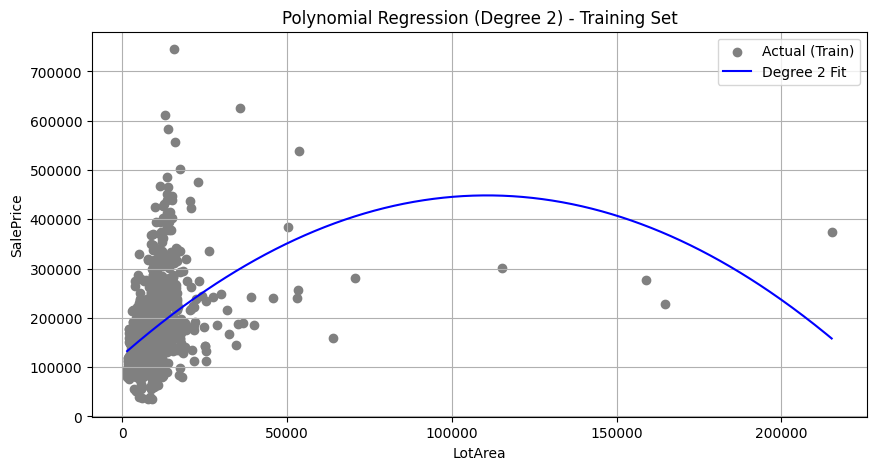

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


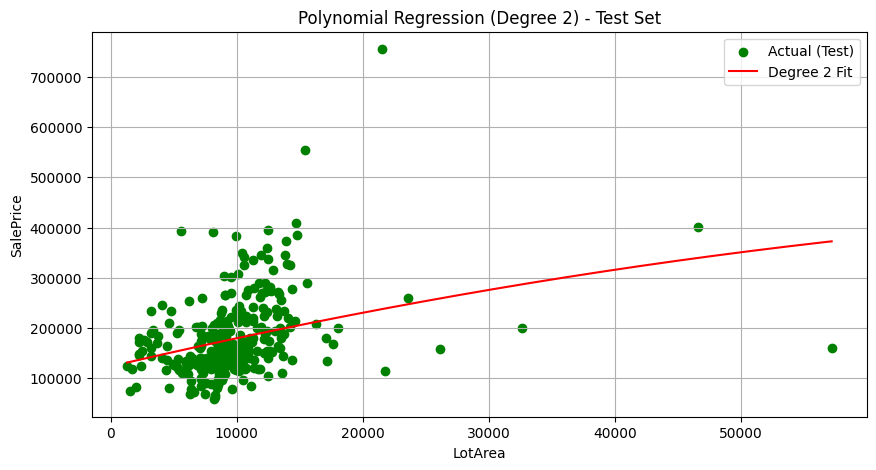


🔺 Polynomial Regression (Degree 3)
Weights (coefficients): [ 9.27908316e+00 -1.06916172e-04  3.28737702e-10]
Intercept: 99455.66421944904
Train R² Score: 0.1729
Test R² Score: 0.1439
Train MSE: 5167779202.35
Test MSE: 5599054681.68


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


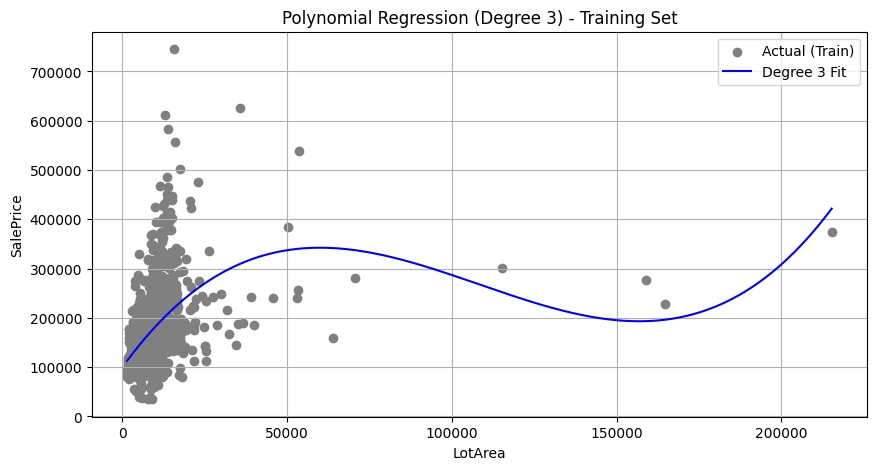

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


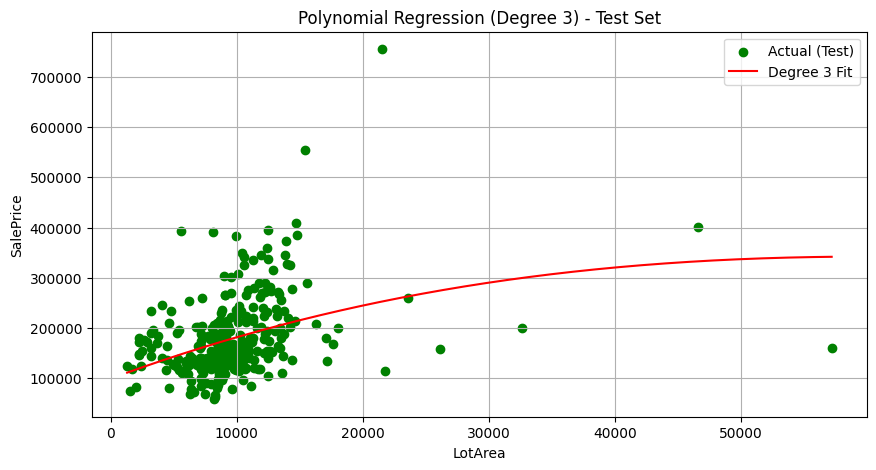

In [ ]:
run_polynomial_regression(2)
run_polynomial_regression(3)


### Visualize Model Predictions

In [ ]:
def plot_predictions(model_name, features, pipeline=None):
    print(f"\n📈 Visualizing Predictions for {model_name}")

    if pipeline:
        # For mixed models, use the fitted pipeline
        y_train_pred = pipeline.predict(X_train[features])
        y_test_pred = pipeline.predict(X_test[features])
    else:
        # For numeric-only models, refit a simple LinearRegression
        model = LinearRegression()
        model.fit(X_train[features], y_train)
        y_train_pred = model.predict(X_train[features])
        y_test_pred = model.predict(X_test[features])

    # Plot Training Set Predictions
    plt.figure(figsize=(10, 5))
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel("Actual SalePrice (Train)")
    plt.ylabel("Predicted SalePrice (Train)")
    plt.title(f"{model_name}: Actual vs. Predicted SalePrice (Train Set)")
    plt.grid(True)
    plt.show()

    # Plot Test Set Predictions
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual SalePrice (Test)")
    plt.ylabel("Predicted SalePrice (Test)")
    plt.title(f"{model_name}: Actual vs. Predicted SalePrice (Test Set)")
    plt.grid(True)
    plt.show()


📈 Visualizing Predictions for Model 1


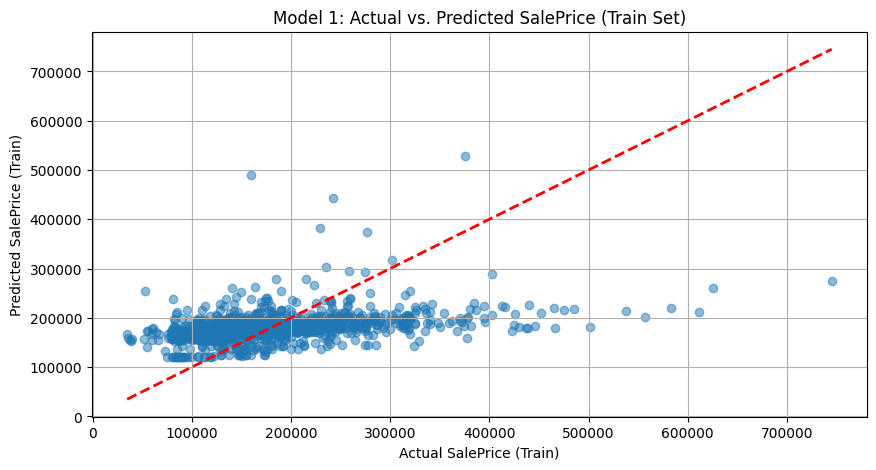

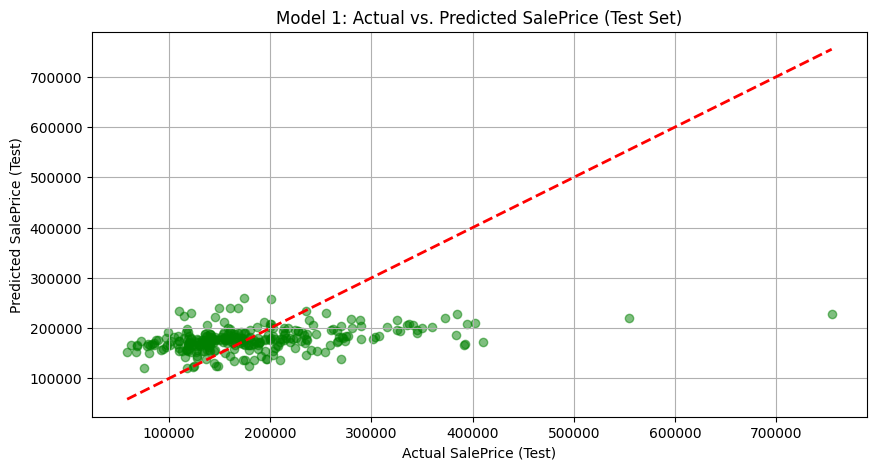


📈 Visualizing Predictions for Model 2


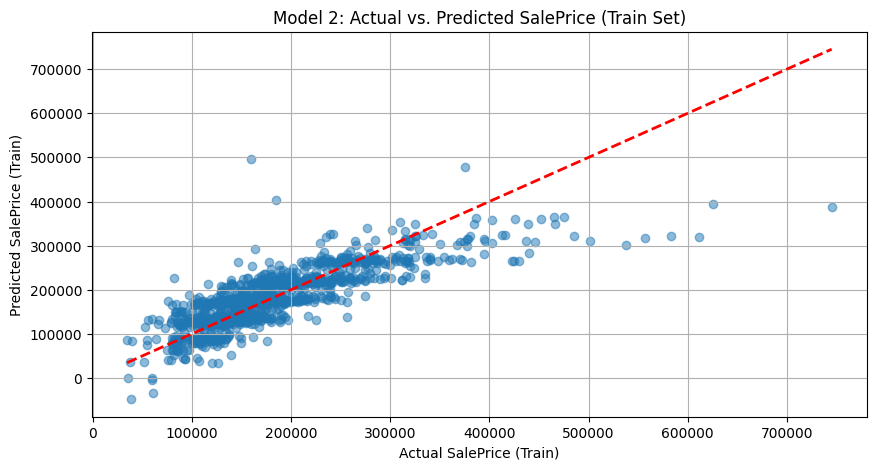

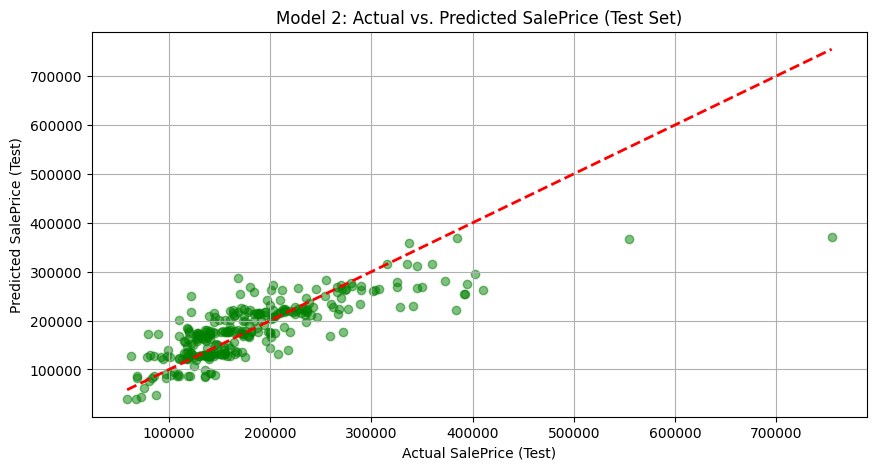


📈 Visualizing Predictions for Model 3


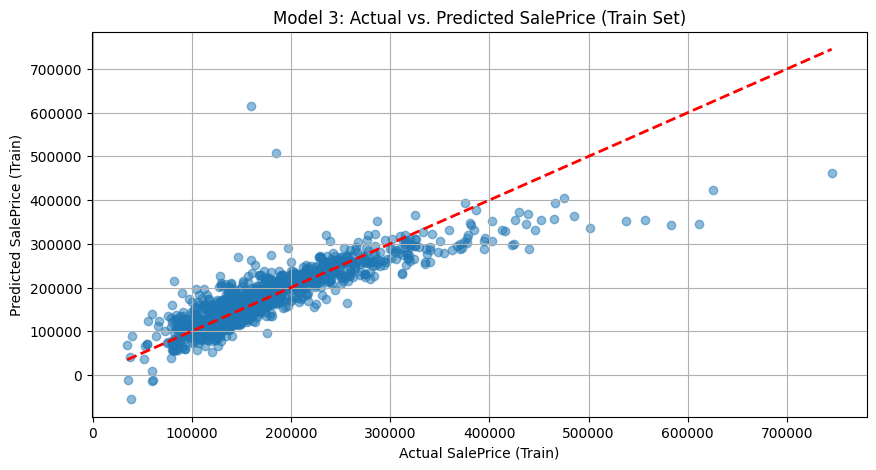

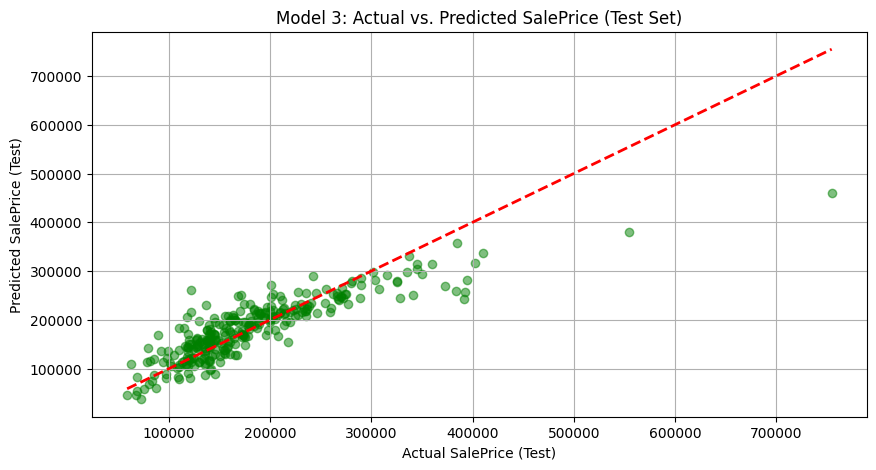

In [ ]:
# Visualize predictions for numeric-only models (Models 1, 2, 3)
numeric_models_features = {
    "Model 1": ['LotFrontage', 'LotArea'],
    "Model 2": ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'],
    "Model 3": ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
}

for model_name, features in numeric_models_features.items():
    plot_predictions(model_name, features)


📈 Visualizing Predictions for Model 4


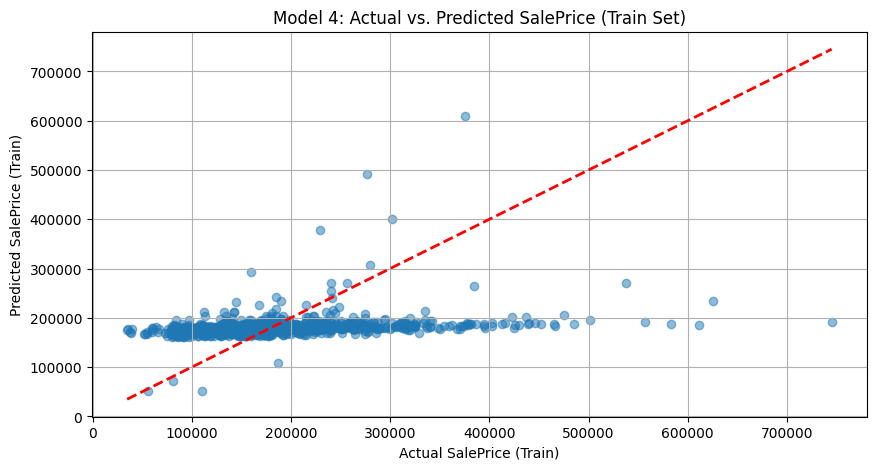

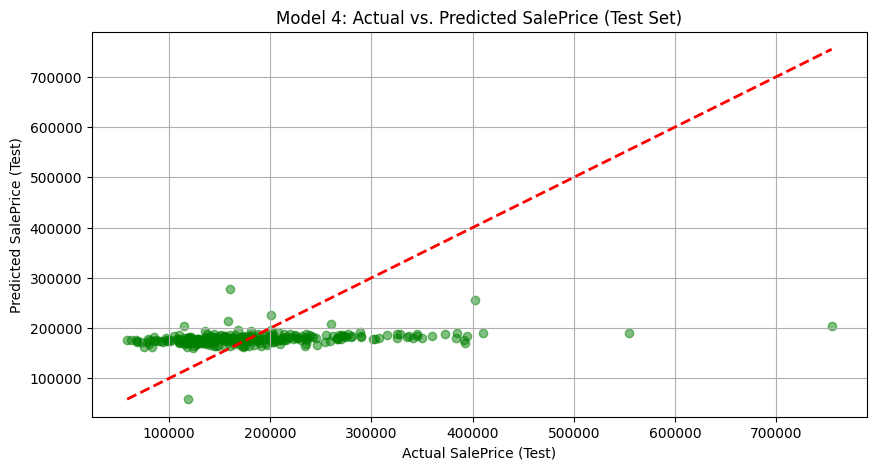


📈 Visualizing Predictions for Model 5


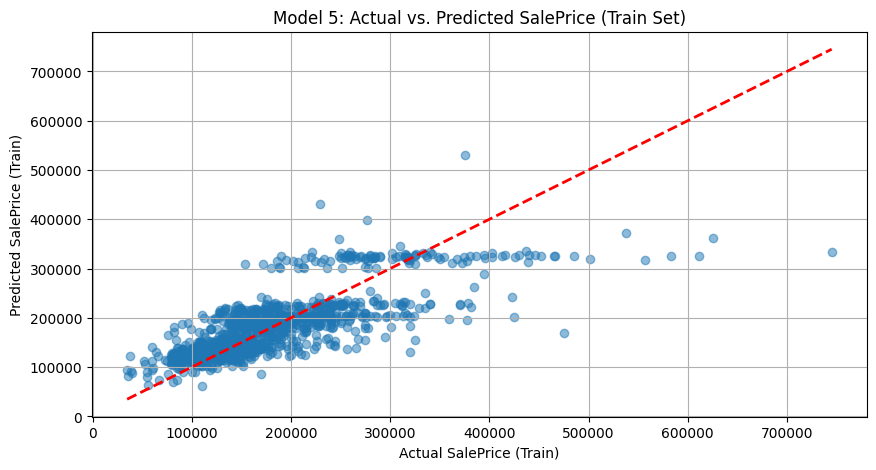

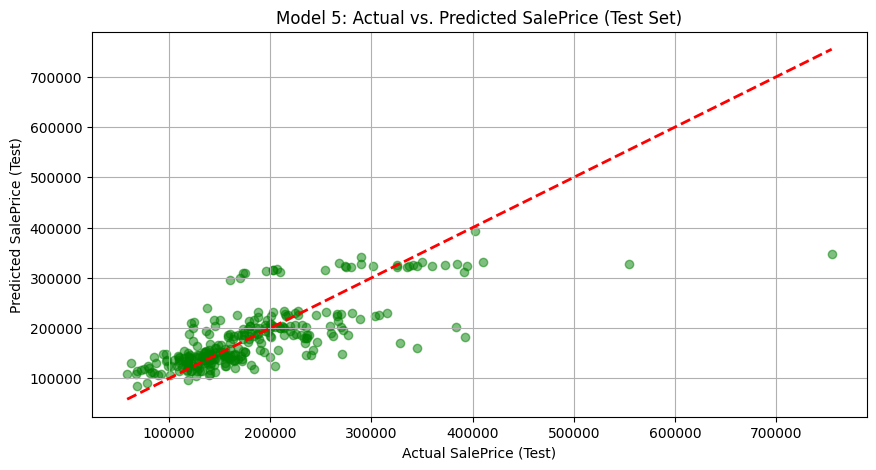


📈 Visualizing Predictions for Model 6


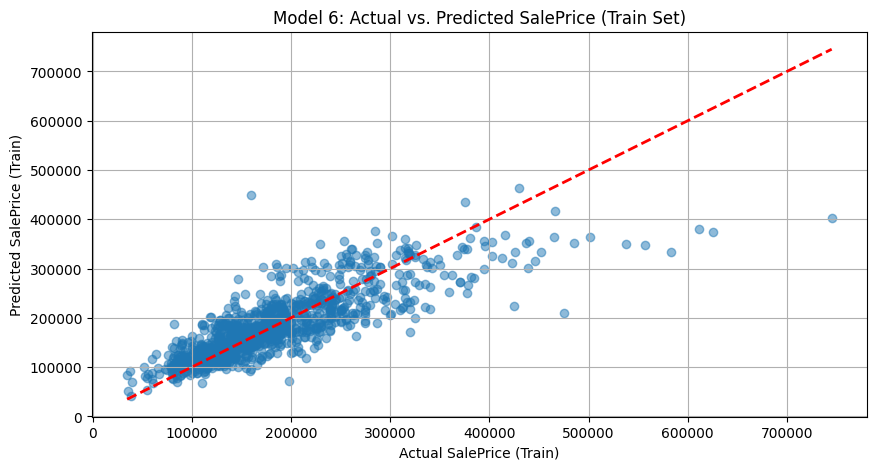

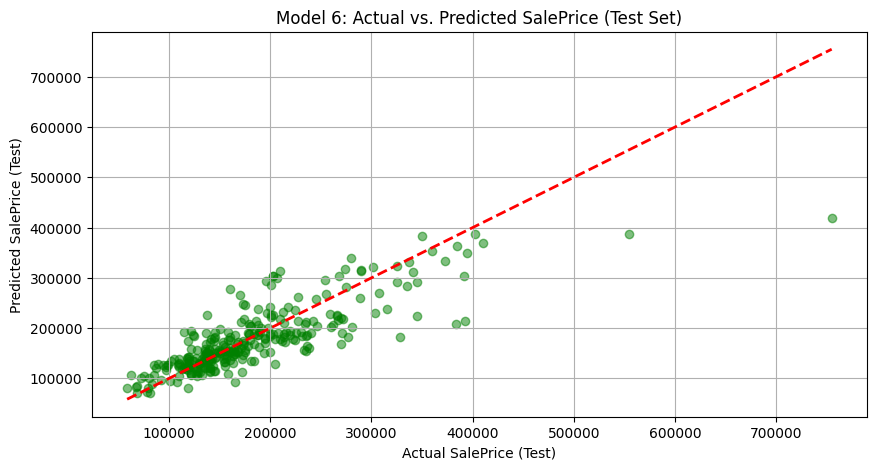

In [ ]:
# Visualize predictions for mixed models (Models 4, 5, 6)
models_mixed_features = {
    "Model 4": ['LotArea', 'Street'],
    "Model 5": ['LotArea', 'OverallCond', 'Street', 'Neighborhood'],
    "Model 6": ['LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YrSold']
}

for model_name, features in models_mixed_features.items():
    # Recreate and fit the pipeline for each mixed model
    numeric_features = [col for col in features if df[col].dtype != 'object']
    categorical_features = [col for col in features if df[col].dtype == 'object']

    preprocessor = ColumnTransformer([
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    pipeline.fit(X_train[features], y_train)

    plot_predictions(model_name, features, pipeline=pipeline)

### Summary of Model Visualization Interpretation

These scatter plots show the relationship between the actual SalePrice values and the SalePrice values predicted by each model.

*   **Ideal Scenario:** In an ideal scenario, the points would lie perfectly along the red dashed line (where Actual SalePrice equals Predicted SalePrice), indicating that the model's predictions are perfectly accurate.

*   **Observations from the Plots:**

    *   **Models 1 and 4 (Simple and Mixed with few features):** The points are quite scattered around the red line, especially for higher SalePrices. This indicates that these models, with fewer features, are not capturing the underlying patterns in the data very well and have a significant amount of error in their predictions. This aligns with their lower R-squared values.
    *   **Models 2 and 5 (Adding more features):** The points show a clearer trend along the red line, particularly for lower to medium SalePrices. This suggests that including more relevant features like `OverallQual` and `OverallCond` (Model 2) or `OverallCond` and `Neighborhood` (Model 5) improves the models' ability to predict SalePrice. However, there is still noticeable scatter, especially for higher SalePrices.
    *   **Models 3 and 6 (More complex models):** These models show a tighter clustering of points around the red line, indicating better predictive performance. The predictions are generally closer to the actual values across a wider range of SalePrices. This is consistent with their higher R-squared values compared to the simpler models. Model 3, which includes `1stFlrSF` and `GrLivArea`, appears to be the best performing based on these visualizations, with the points most closely following the ideal line. Model 6, which adds `Street`, `Neighborhood`, and `YrSold`, also performs well, with a similar distribution of points around the line as Model 3.

In summary, the visualizations confirm the findings from the R-squared values: models with more relevant features (Models 2, 3, 5, and 6) are better at predicting SalePrice than simpler models (Models 1 and 4). Models 3 and 6, which incorporate a richer set of features, show the strongest alignment between actual and predicted values, indicating better overall predictive accuracy.